# 2024 HENHACKS - AI Predictive UD Crime Model

*This Machine Learning AI model uses cleaned data from UD Police Daily Statistics (2017-2021) and creates crome description predictions based on an inputed LOCATION, DATE, & TIME.*

### Step 1: Clean and Check Data

Most of the data was cleaned in excel by:
- splitting the dates to day, month year
- reducing the errors so that Locations, and Crime Descriptions aren't duplicated
- standardizing time data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# removes warnings
pd.options.mode.chained_assignment = None

In [2]:
pd.set_option('display.max_columns', None)
crimes = pd.read_csv('clean_crime_data.csv')
crimes

,Incident #,Time,Date Occurred,Description,Location,Disposition,Day Occurred,Month Occurred,Year Occurred
0,17-00012,1436,1/1/17,Possession of Marijuana,Christiana Towers,Administrative Sanction,1,1,2017
1,17-00043,2305,1/2/17,Possession of Marijuana,Christiana Towers,Civil Assessment,2,1,2017
2,17-00096,819,1/4/17,Damaged Property,College of Arts and Sciences,Pending,4,1,2017
3,17-00171,949,1/6/17,Graffiti,Hullihen Hall,Pending,6,1,2017
4,17-00201,13,1/7/17,Possession of Marijuana,S College Ave/Main St,Pending,7,1,2017
...,...,...,...,...,...,...,...,...,...
3585,21-12985,1936,11/6/21,Damaged Property,Ray Street Hall A,Pending,6,11,2021
3586,21-12995,13,11/6/21,Disorderly Conduct,Louis Redding Hall,Pending,6,11,2021
3587,21-12997,25,11/7/21,Loud Party,Wilbur St,Administrative Sanction,7,11,2021
3588,21-13001,103,11/7/21,Damaged Property,South Academy Residence Hall,Pending,7,11,2021


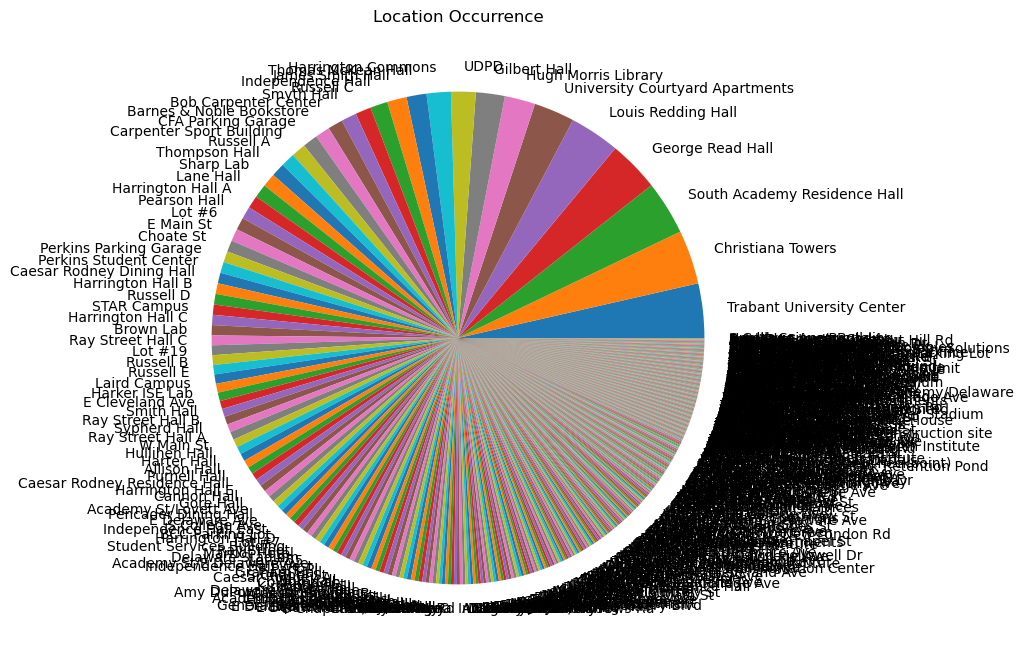

In [3]:
''' GRAPHING CRIME LOCATIONS '''
location_counts = crimes['Location'].value_counts()

# Extract location names and corresponding counts
locations = location_counts.index.tolist()
counts = location_counts.values.tolist()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=locations)
plt.title('Location Occurrence')
plt.show()

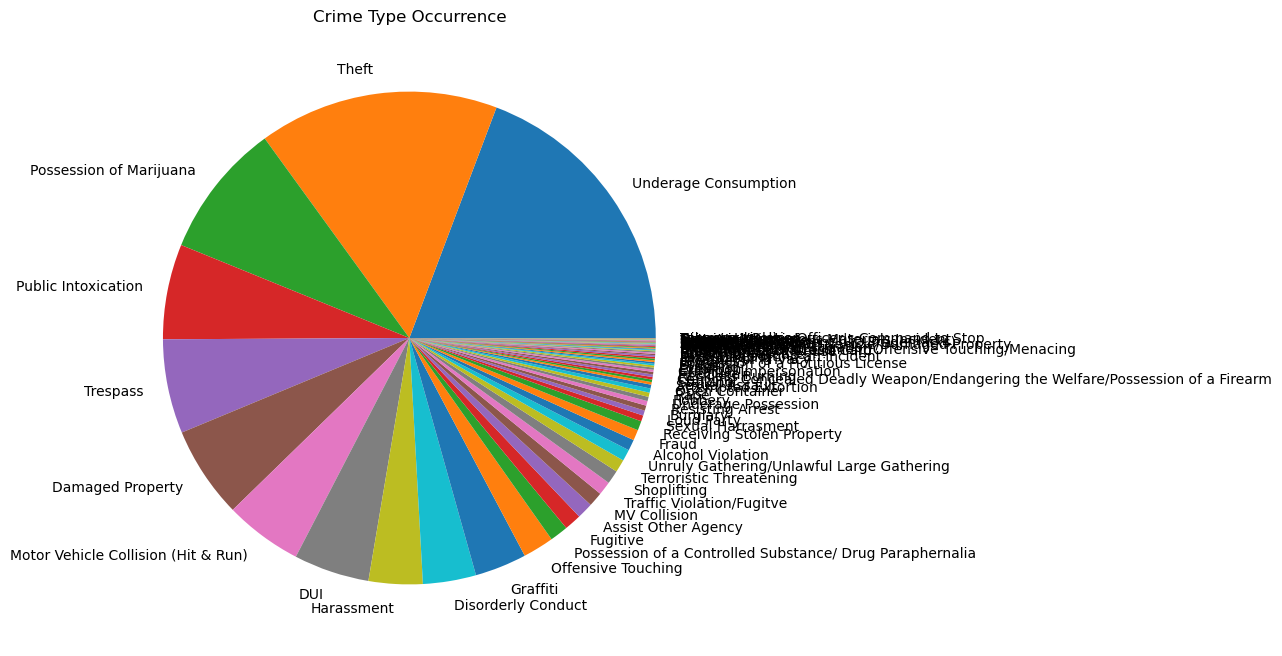

In [4]:
''' GRAPHING CRIME DESCRIPTION '''

description_count = crimes['Description'].value_counts()

# Extract description names and corresponding counts
description = description_count.index.tolist()
counts = description_count.values.tolist()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=description)
plt.title('Crime Type Occurrence')
plt.show()

### Step 2: Data Preparation

Machine learning models are essentially mathematical models. So it requires numerial values.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Remove columns that are not needed and create dataset
crimes = crimes[['Time', 'Description', 'Location', 'Day Occurred', 'Month Occurred', 'Year Occurred']]

# Encode categorical values
label_encoders = {}
for col in crimes:
    label_encoders[col] = LabelEncoder()
    crimes[col] = label_encoders[col].fit_transform(crimes[col])

# Split into X and Y (target and feature categories)
X_crimes = crimes[['Time', 'Location', 'Day Occurred', 'Month Occurred', 'Year Occurred']]
y_crimes = crimes[['Description']]

# Make categorical values numerical
X_crimes = pd.get_dummies(X_crimes)

### Step 3: Implement Model Type

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_crimes, y_crimes, test_size=0.2, random_state=42)

# Define preprocessing and training
clf = DecisionTreeClassifier().fit(X_train.values, y_train.values)

y_pred = clf.predict(X_test.values)
y_pred

array([62, 67, 46, 67, 65, 28, 62, 42,  2, 62, 13, 16, 29, 29, 65, 67,  6,
       42, 42, 62, 62, 16, 38, 38, 42,  5, 46, 67, 14, 65, 68, 51, 39, 27,
       46, 67, 62, 39, 42, 42, 42, 42, 62, 67,  2, 39, 16, 62, 62, 42, 14,
        2, 46, 38, 62, 62, 67, 28, 67, 46, 61, 62, 62, 65, 62, 65, 67, 67,
       67, 67, 38, 13, 46, 29, 13, 28, 65, 14, 42, 54, 62, 13, 28, 42, 42,
       21, 29, 28, 46, 62, 42, 67, 29, 27, 62, 38, 38, 65, 27, 62, 67, 62,
       16,  2, 65, 28, 29, 16,  5, 67, 26, 67, 29, 62, 14, 65, 67, 46, 28,
       62, 67, 67,  0, 14, 38, 16, 46, 67, 46, 28, 38, 14, 62, 29, 62, 16,
       62, 13, 67, 28, 67, 46, 28, 70, 67, 62, 42, 42, 16, 13, 13, 67, 67,
       67, 38, 62, 13, 62, 42, 42, 42, 38, 67, 47, 13, 67, 62, 28, 26, 28,
       13, 67, 29, 65, 67, 42, 61, 67, 13, 62, 39, 14, 43, 38, 38, 38, 62,
       62, 67, 38, 13, 14,  8, 46, 62, 14, 67, 16, 67, 42, 67, 14, 62, 14,
       42, 29, 16, 35, 38, 62, 39, 28, 62, 65, 46, 65, 39, 67, 22, 67, 46,
       13, 16, 38, 62, 46

#### Accuracy

In [7]:
# Returns the coefficient of determination of the prediction
# Basically how well it did ... not great
clf.score(X_test.values, y_test.values)

0.2381615598885794

### Step 4: Evaluate Model

Attempting to understand what all this data means :3

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<Axes: >

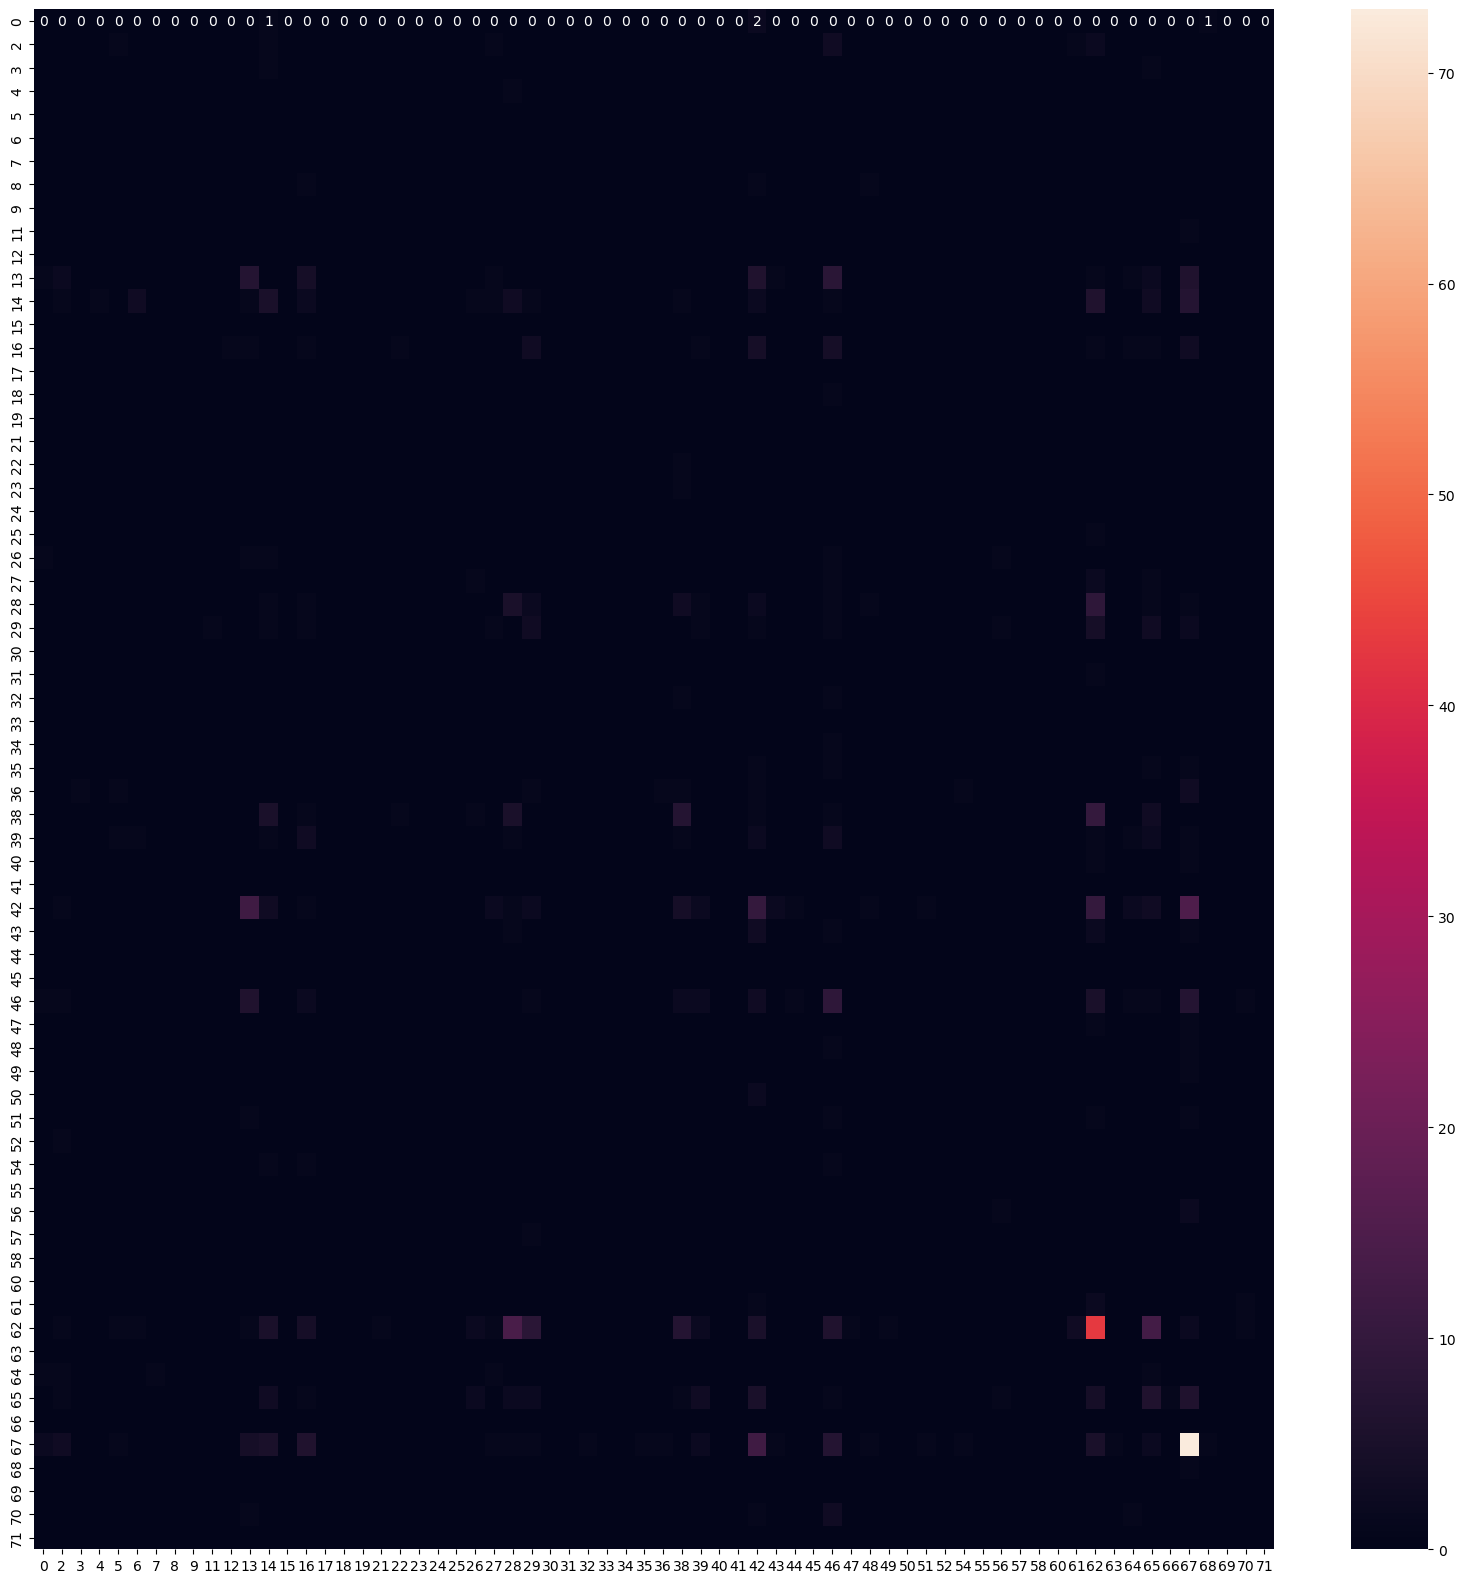

In [9]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)

## Example Prediction

In [20]:
# Predict Crime Description for given Location and date/time
sample_location = "Smith Hall"
sample_time = 1000
sample_day = 2
sample_month = 3
sample_year = 2024

sample_location_encoded = label_encoders["Location"].transform([sample_location])[0]

predict_description = clf.predict([[sample_time, sample_location_encoded, sample_day, sample_month, sample_year]])
print(label_encoders["Description"].inverse_transform(predict_description))

['Trespass']
